In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 머신러닝

## 학생 결석 여부 확인 데이터
/kaggle/input/adp-p8/problem1.csv


성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
나이(age) 숫자: 15 - 22     
부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
학고횟수(failures)  숫자 : 1, 2, 3 else 4     
자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)    

### 1-1 데이터 EDA 및 시각화

In [2]:
df= pd.read_csv('problem1.csv')
df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


<AxesSubplot:>

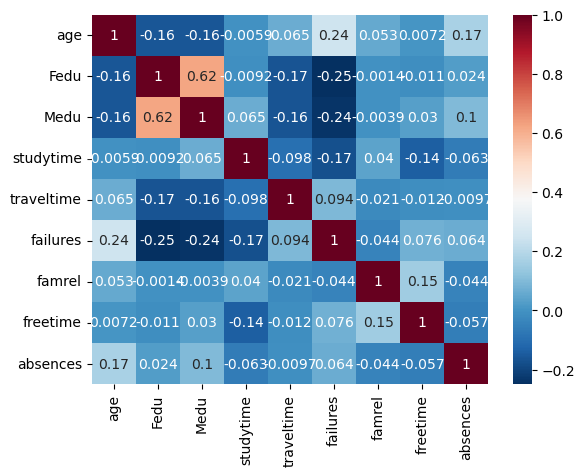

In [ ]:
# target 변수의 absences와의 상관계수 

df_cor = df.corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns, cmap='RdBu_r', annot=True)

- age가 absences와 그나마 연관성이 있어보임
- Fedu와 Medu는 다중공선성이 있어보인다, 부모의 학력은 서로 상관이 있다. 비슷한 사람끼리 만난다.

ValueError: could not convert string to float: 'A'

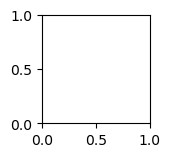

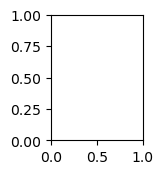

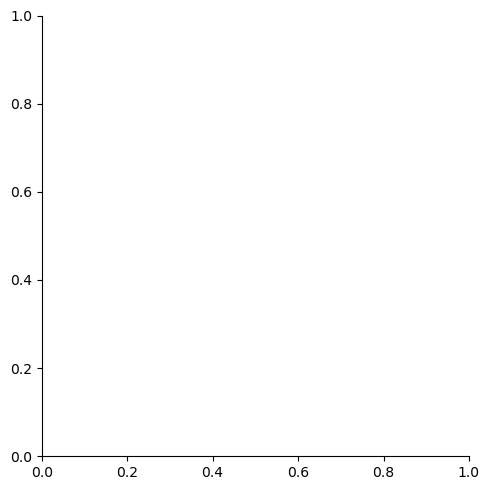

In [29]:
cols = list(set(df.columns) - set('absences'))

for i in range(1,12,1):
    for col_name in cols:
        plt.subplot(3,4,i)
        sns.lmplot(x=col_name, y='absences', data=df)
        plt.title(col_name)
plt.show()


### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

결측치의 갯수가 많지 않으므로 (traveltime:0.7%, freetime:1%, age: 0.7%) 해당하므로 해당 데이터를 drop 하는 정도로 마무리한다.

In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         384 non-null    object 
 1   age         384 non-null    float64
 2   Pstatus     384 non-null    object 
 3   Fedu        384 non-null    int64  
 4   Medu        384 non-null    int64  
 5   guardian    384 non-null    object 
 6   studytime   384 non-null    int64  
 7   traveltime  384 non-null    float64
 8   failures    384 non-null    int64  
 9   famrel      384 non-null    int64  
 10  freetime    384 non-null    float64
 11  absences    384 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 39.0+ KB


### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

## 1-6 모델 최적화 방안에 대해 구체적으로 설명하라

# 통계분석

# 2
## 광고횟수와 광고비에 따른 매출액의 데이터이다. 
/kaggle/input/adp-p8/problem2.csv

### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

### 2-2 회귀식이 유의한지 판단

# 3
## A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3-1 귀무가설과 대립가설을 세워라 

### 3-2 두 평균이 차이가 있는지 검정하라

# 4
## 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p8/problem4.png?raw=true)

# 5 주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]     
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

### sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 